# Lab 8 - PCC177/BCC406

## REDES NEURAIS E APRENDIZAGEM EM PROFUNDIDADE

## Modelos Generativos

### Prof. Eduardo e Prof. Pedro

Objetivos:

- Parte I : Compressão com AE

- Parte II : Detecção de anomalias

- Parte III: Redes Generativas Adversariais

Data da entrega : 12/12/23

- Complete o código (marcado com ToDo) e quando requisitado, escreva textos diretamente nos notebooks. Onde tiver *None*, substitua pelo seu código.
- Execute todo notebook e salve tudo em um PDF **nomeado** como "NomeSobrenome-Lab.pdf"
- Envie o PDF via google [FORM](https://forms.gle/SyQggcn7S2xQaMud9)

Este notebook é baseado em tensorflow e Keras.


# Parte I: Autoencoder para redução de dimensionalidade (30pt)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

Carrega dataset Fashon MNIST dataset.
Cada imagem tem resolução 28x28 pixels.

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4422102/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


## Exemplo de classes
![mnist fashion](https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/images/intro_autoencoder_result.png?raw=1)




Abaixo exemplo de implementação de autoencoder apena com camadas densas. O  `encoder`, comprime as imegns em 4 dimensões (latent_dim), e o `decoder` reconstróe a imagem a partir do vetor latente.

O exemplo abaixo usa a [Keras Model Subclassing API](https://www.tensorflow.org/guide/keras/custom_layers_and_models).

In [3]:
latent_dim = 4

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [4]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [5]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 16s 6ms/step - loss: 0.0506 - val_loss: 0.0374
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0353 - val_loss: 0.0338
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0333 - val_loss: 0.0328
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0328 - val_loss: 0.0326
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0326 - val_loss: 0.0325
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0325 - val_loss: 0.0324
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0324 - val_loss: 0.0323
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0324 - val_loss: 0.0323
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0323 - val_loss: 0.0322
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.03



Treine o modelo e veja os resultados da re-construção.

In [6]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

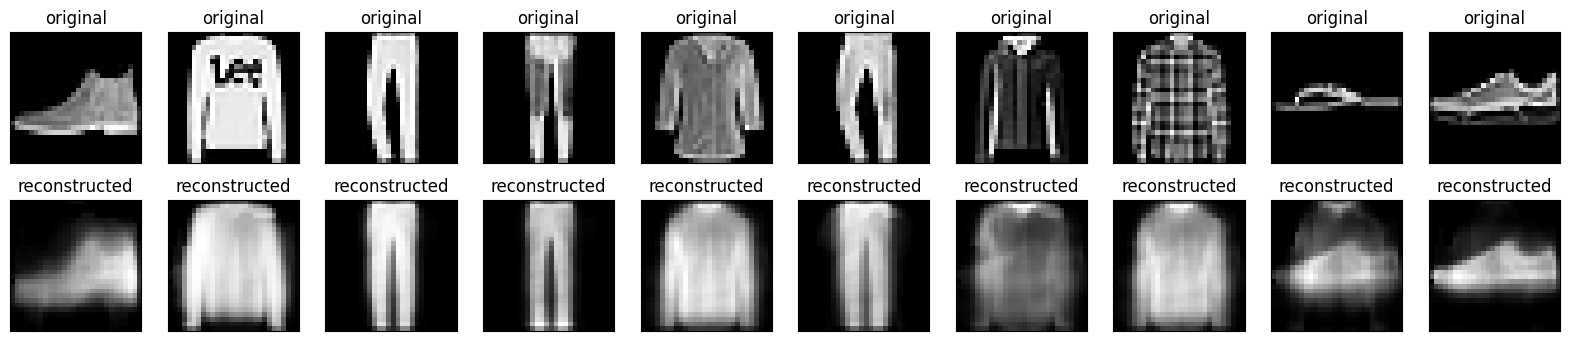

In [7]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## ToDo : Testes (15pt)

Faça testes com vetor latente de dimensões 2, 8, 16 e 64.


Testing with latent dimension 2
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0687 - val_loss: 0.0571
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0535 - val_loss: 0.0496
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0473 - val_loss: 0.0455
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0450 - val_loss: 0.0445
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0445 - val_loss: 0.0443
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0444 - val_loss: 0.0442
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0443 - val_loss: 0.0442
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0443 - val_loss: 0.0441
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0442 - val_loss: 0.0441
Epoch 10/10
1875/1875 [==========================

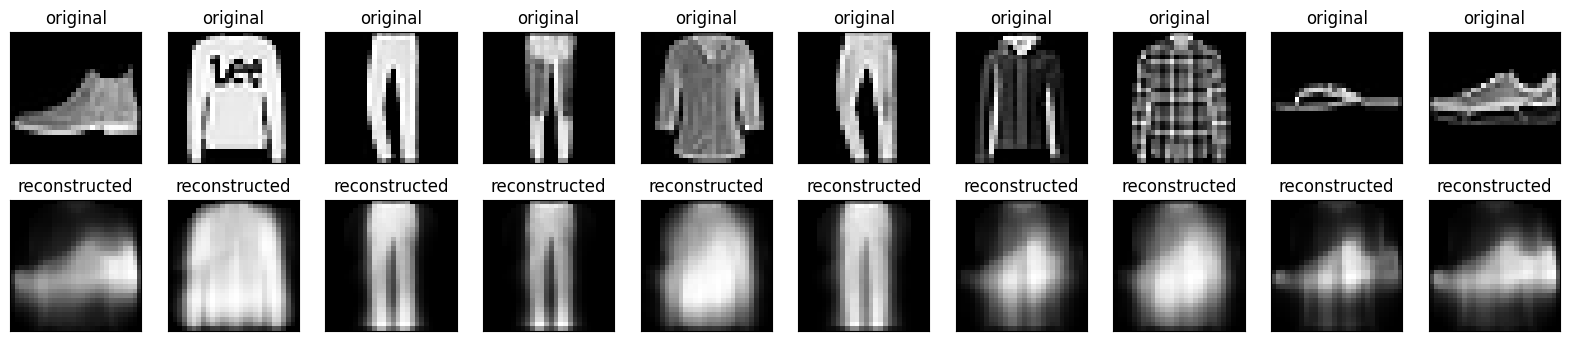


Testing with latent dimension 8
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0415 - val_loss: 0.0283
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0264 - val_loss: 0.0254
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0252 - val_loss: 0.0249
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0248 - val_loss: 0.0247
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0244 - val_loss: 0.0236
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0233 - val_loss: 0.0232
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0231 - val_loss: 0.0231
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0231 - val_loss: 0.0230
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0230 - val_loss: 0.0230
Epoch 10/10
1875/1875 [==========================

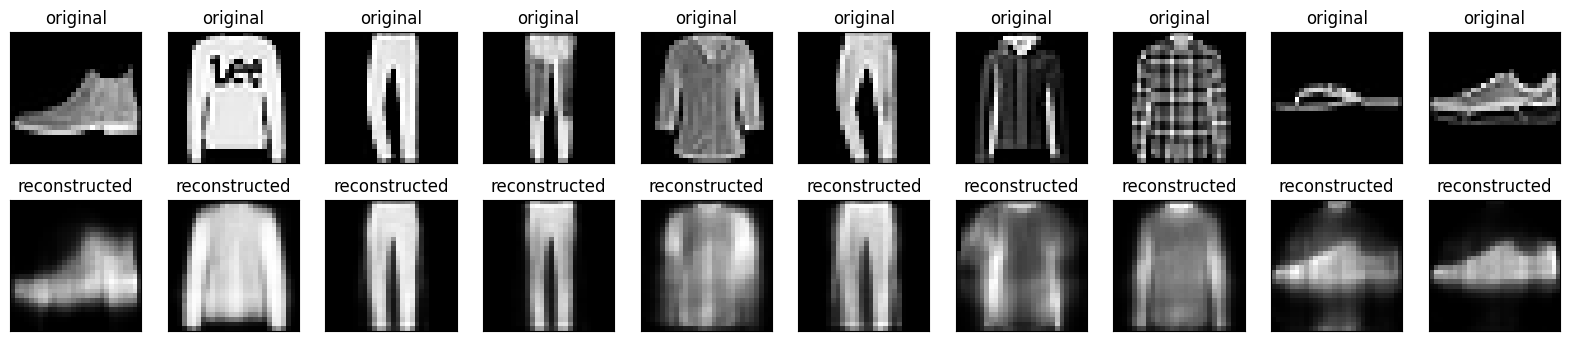


Testing with latent dimension 16
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0337 - val_loss: 0.0217
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0196 - val_loss: 0.0188
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0183 - val_loss: 0.0181
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0179 - val_loss: 0.0179
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0177 - val_loss: 0.0177
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0176 - val_loss: 0.0178
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0175 - val_loss: 0.0176
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0175 - val_loss: 0.0175
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0174 - val_loss: 0.0176
Epoch 10/10
1875/1875 [=========================

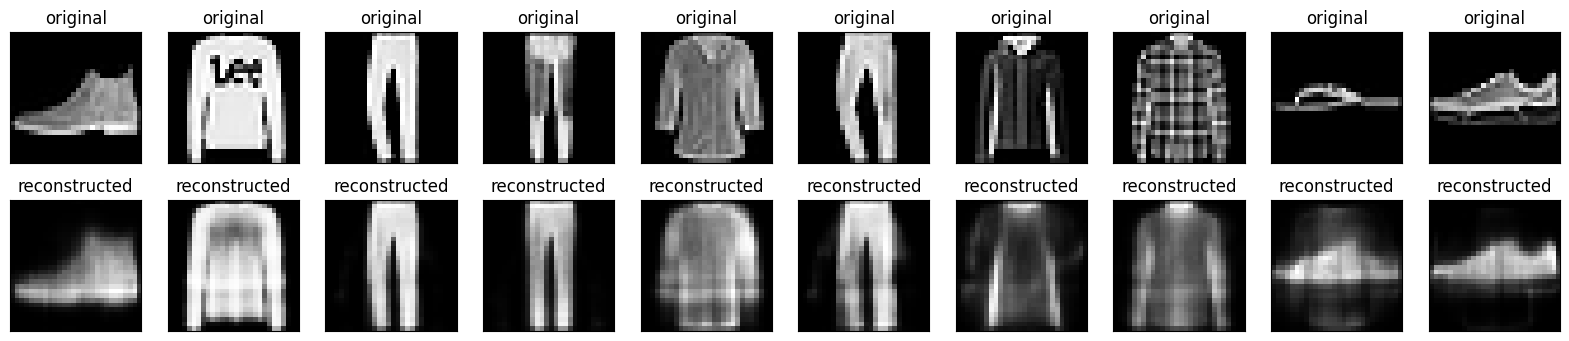


Testing with latent dimension 64
Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0236 - val_loss: 0.0130
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0115 - val_loss: 0.0105
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0100 - val_loss: 0.0097
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0088 - val_loss: 0.0089
Epoch 10/10
1875/1875 [=========================

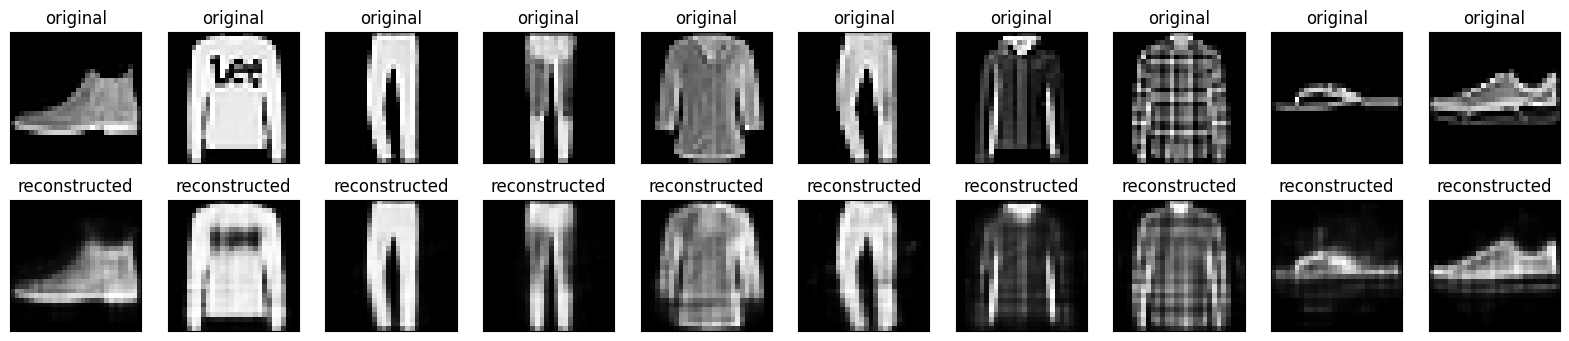

In [8]:
def trainModel(dims):
  autoencoder = Autoencoder(dims)
  autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
  autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

  encoded_imgs = autoencoder.encoder(x_test).numpy()
  decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

  n = 10
  plt.figure(figsize=(20, 4))
  for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
  plt.show()

latent_dimensions = [2, 8, 16, 64]

for dim in latent_dimensions:
    print(f"\nTesting with latent dimension {dim}")
    trainModel(dim)

## ToDo : Responda (15pt)

Os diferentes aspectos a considerar ao escolher a dimensão latente em um modelo incluem a qualidade da reconstrução, a velocidade de treinamento, o risco de overfitting, a capacidade de generalização, a visualização dos resultados e o trade-off entre compressão e fidelidade da reconstrução. A qualidade da reconstrução geralmente melhora com dimensões latentes maiores, capturando características mais complexas, mas também aumentando o risco de overfitting. Dimensões latentes menores podem acelerar o treinamento, mas podem resultar em perda de informação e imagens menos detalhadas. A capacidade de generalização é avaliada pelo desempenho em conjuntos de validação ou teste, onde uma dimensão latente intermediária pode oferecer a melhor generalização. A visualização das imagens originais e reconstruídas destaca como o modelo preserva as características importantes. Há um trade-off entre a compressão (dimensão latente pequena) e a fidelidade da reconstrução, e a escolha da dimensão latente influencia a complexidade global do modelo, sendo necessário encontrar um equilíbrio adequado para a tarefa e conjunto de dados específicos

# Parte II: Detecção de anomalias (30pt)


## Intro

Neste exemplo, você vai detectar anomalis em sinaos de eletrocardiograma (ECG). Para tal, treine um autoencoder no dataset [ECG5000 dataset](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000). Este dataset contém 5000 batimentos de ECG (https://en.wikipedia.org/wiki/Electrocardiography), cada um com 140 amostras (pontos) na curva. Cada instância da base de dados (um batimento) foi rotulado como zero (0) ou um (1). A classe zero corresponde a um batimento anormal e a classe um a um batimento de classe normal. Queremos identificar os anormais.

Para detectar anomalias usando um autoencoder você deve treinar um autoencoder apenas em batimentos normais. Ele vai aprender a re-construir os batimentos saudáveis. A hipóteses é que os batimentos anormais vão divergir no padrão, quando compararmos a entrada com a re-construção.

## Carrega base de ECG

Base de dados detalhada no site: [timeseriesclassification.com](http://www.timeseriesclassification.com/description.php?Dataset=ECG5000).


In [9]:
# Download the dataset
dataframe = pd.read_csv('http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv', header=None)
raw_data = dataframe.values
dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [10]:
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)

Normaliza entre `[0,1]`.


In [11]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

Vamos separar os batimentos normais (label 1) para treinar o Autoencoder.

In [12]:
train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

Plote um batimento normal.

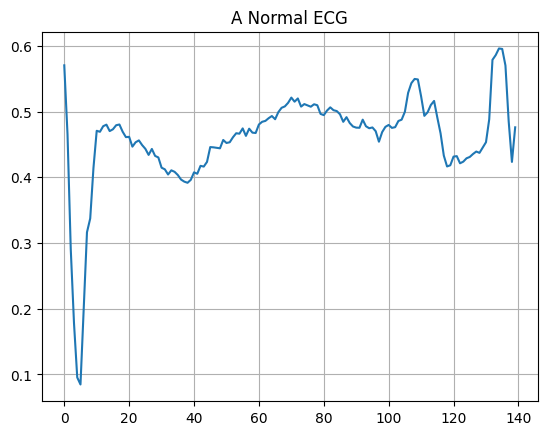

In [13]:
plt.grid()
plt.plot(np.arange(140), normal_train_data[0])
plt.title("A Normal ECG")
plt.show()

Plote um batimento anômalo.

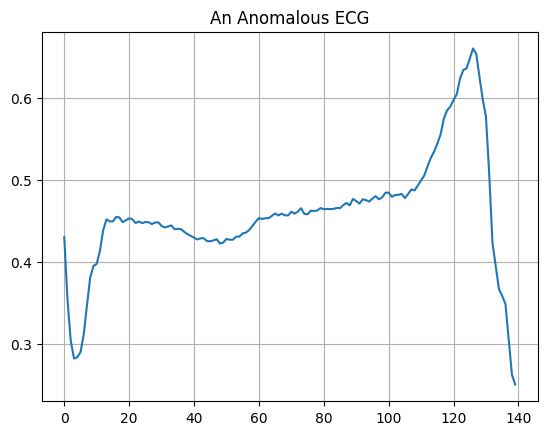

In [14]:
plt.grid()
plt.plot(np.arange(140), anomalous_train_data[0])
plt.title("An Anomalous ECG")
plt.show()

## ToDo : Construção de um modelo (30pt)

Construa um modelo. Primeiramente tente construir apenas com camadas densas. Depois, tente construir um modelo com camadas de convolução de uma dimensão (Lembre-se que um sinal de ECG é uma série temporal de uma dimensão). [Conv1D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D)

In [15]:
# class AnomalyDetector(Model):
#     def __init__(self):
#         super(AnomalyDetector, self).__init__()

#         # Encoder
#         self.encoder = tf.keras.Sequential([
#             layers.Conv1D(filters=32, kernel_size=5, activation='relu', padding='same'),
#             layers.MaxPooling1D(pool_size=2, padding='same'),
#             layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'),
#             layers.MaxPooling1D(pool_size=2, padding='same'),
#             layers.Conv1D(filters=8, kernel_size=3, activation='relu', padding='same'),
#             layers.MaxPooling1D(pool_size=2, padding='same'),
#         ])

#         # Decoder
#         self.decoder = tf.keras.Sequential([
#             layers.Conv1D(filters=8, kernel_size=3, activation='relu', padding='same'),
#             layers.UpSampling1D(size=2),
#             layers.Conv1D(filters=16, kernel_size=3, activation='relu', padding='same'),
#             layers.UpSampling1D(size=2),
#             layers.Conv1D(filters=32, kernel_size=5, activation='relu', padding='same'),
#             layers.UpSampling1D(size=2),
#             layers.Conv1D(filters=1, kernel_size=3, activation='sigmoid', padding='same')
#         ])

#     def call(self, x):
#         encoded = self.encoder(x)
#         decoded = self.decoder(encoded)
#         return decoded

# ------------------------------------------------------------------------------------------------------------------------

class AnomalyDetector(Model):
    def __init__(self):
        super(AnomalyDetector, self).__init__()
        self.encoder = tf.keras.Sequential([
            layers.Dense(64, activation='relu'),
            layers.Dense(32, activation='relu'),
            layers.Dense(16, activation='relu')
        ])

        self.decoder = tf.keras.Sequential([
            layers.Dense(32, activation='relu'),
            layers.Dense(64, activation='relu'),
            layers.Dense(140, activation='sigmoid')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = AnomalyDetector()

In [16]:
autoencoder.compile(optimizer='adam', loss='mae')

Depois de treinar com os batimentos normais, avalie com os anormais.

In [17]:
history = autoencoder.fit(normal_train_data, normal_train_data,
          epochs=20,
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True)

Epoch 1/20
5/5 [==============================] - 3s 42ms/step - loss: 0.0568 - val_loss: 0.0518
Epoch 2/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0513 - val_loss: 0.0493
Epoch 3/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0455 - val_loss: 0.0462
Epoch 4/20
5/5 [==============================] - 0s 9ms/step - loss: 0.0398 - val_loss: 0.0429
Epoch 5/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0346 - val_loss: 0.0406
Epoch 6/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0306 - val_loss: 0.0387
Epoch 7/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0278 - val_loss: 0.0372
Epoch 8/20
5/5 [==============================] - 0s 12ms/step - loss: 0.0258 - val_loss: 0.0358
Epoch 9/20
5/5 [==============================] - 0s 11ms/step - loss: 0.0241 - val_loss: 0.0343
Epoch 10/20
5/5 [==============================] - 0s 10ms/step - loss: 0.0226 - val_loss: 0.0336
Epoch 11/20
5/5 [=============

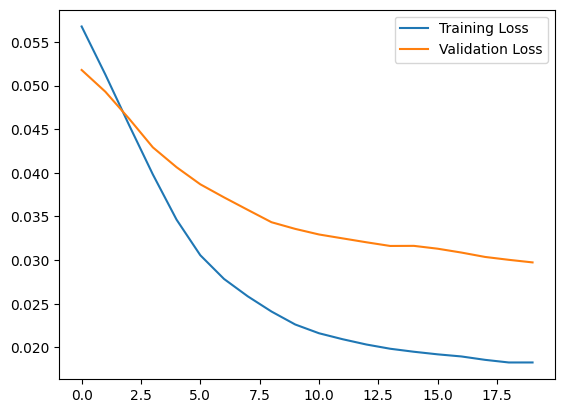

In [18]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()

Você vai considerar um batimento como anômalo se ele divergir masi que um desvio padrão das amostras normais. Primeiro, vamos plotar um batimento normal a partir da base de treino e sua reconstrução. Assim, poderemos calcular o erro de re-construção.

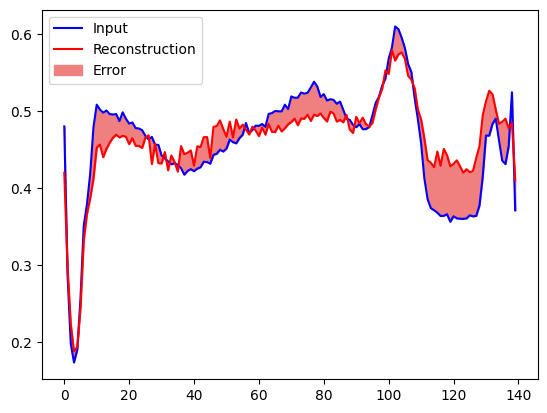

In [19]:
encoded_data = autoencoder.encoder(normal_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(normal_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Imagem esperada:

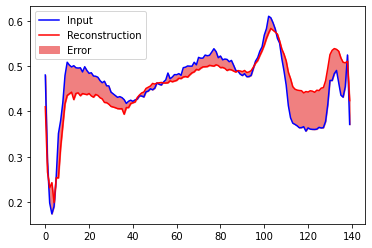



Vamos fazer o mesmo para um batimento anômalo.

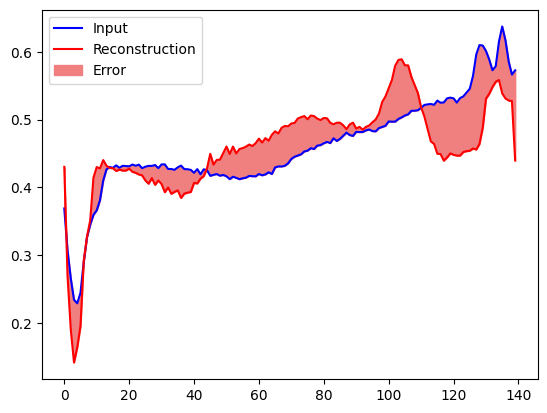

In [20]:
encoded_data = autoencoder.encoder(anomalous_test_data).numpy()
decoded_data = autoencoder.decoder(encoded_data).numpy()

plt.plot(anomalous_test_data[0], 'b')
plt.plot(decoded_data[0], 'r')
plt.fill_between(np.arange(140), decoded_data[0], anomalous_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

Imagem esperada:

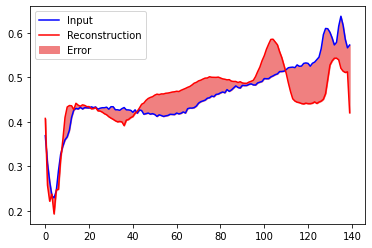

## Detectando as anomalias

Vamos detectar as anomalis se o erro de reconstrução for maior que um limiar. Aqui, vamos calcular o erro médio para os exemp;los normais do treino e depois, classificar os anormais do teste, que tenha erro de reconstrução maior que um desvio padrão.


Plota erro de reconstrução de batimentos normais do treino

74/74 [==============================] - 0s 2ms/step


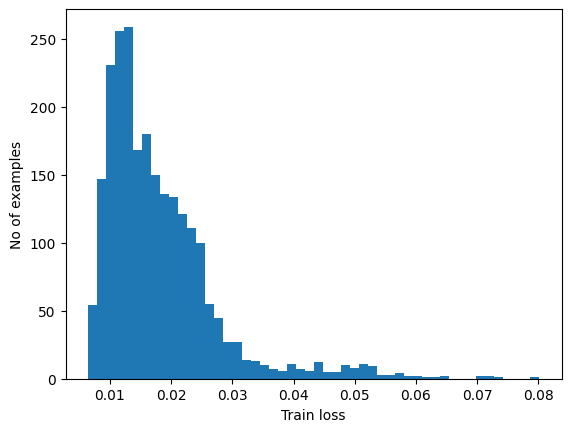

In [21]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

Escolha do limiar.

In [22]:
threshold = np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.027593475


14/14 [==============================] - 0s 2ms/step


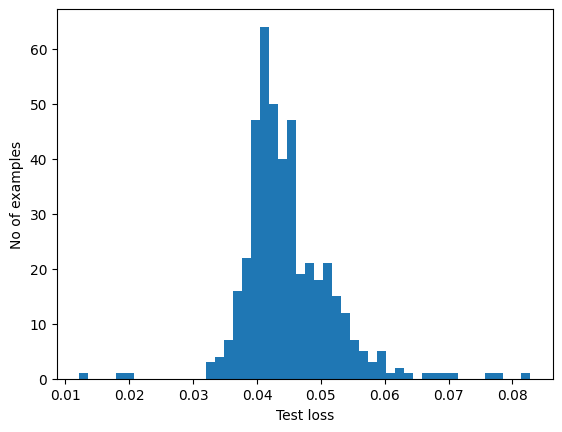

In [23]:
reconstructions = autoencoder.predict(anomalous_test_data)
test_loss = tf.keras.losses.mae(reconstructions, anomalous_test_data)

plt.hist(test_loss[None, :], bins=50)
plt.xlabel("Test loss")
plt.ylabel("No of examples")
plt.show()

Classificação.

In [24]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, predictions)))
  print("Precision = {}".format(precision_score(labels, predictions)))
  print("Recall = {}".format(recall_score(labels, predictions)))

Calcule a acurácia para os dois modelos (com camadas densas e convolucionais)

In [25]:
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

Accuracy = 0.941
Precision = 0.9940828402366864
Recall = 0.9


#Parte III: Redes Generativas Adversariais (40pt)

Leia o tutorial sobre a pix2pix em [Tensofrflow Tutorials](https://www.tensorflow.org/tutorials/generative/pix2pix). O pix2pix foi apresentado em [Image-to-image translation with conditional adversarial networks by Isola et al. (2017)](https://arxiv.org/abs/1611.07004) e se trata de uma rede generativa adversarial condicional para geração de fachadas de prédios condicionada a uma máscara reprtesentando a arquitetura. baixe o noterbook do tutorial, estude e treine a GAN. Após o treinamento, construa você mesmo 3 máscaras (usando algum software de desenho) e faça uma inferência com a rede. Anexe no notebook a máscara e sua respectiva saída.

## ToDo : Fachadas de prédios (40pt)

## Minhas Imagens

In [26]:
# ToDO : Criar 3 máscaras e gerar 3 saídas com a pix2pix para o problema de fachadas de prédios.

# Copia do Tutorial para fazer as execução e criar minhas máscaras e gerar as saídas
# https://colab.research.google.com/drive/1zhnbgFjBWycNNJrSChnAp_4oLSb9o6-W?usp=sharing

# from google.colab import drive
# drive.mount('/content/drive')

# imagePath = '/content/drive/MyDrive/Colab Notebooks/Lab8/Data/1.jpg'
# input_image, real_image = load_image_test(imagePath)
# generate_images(generator, tf.expand_dims(input_image, 0), tf.expand_dims(real_image, 0))

# imagePath = '/content/drive/MyDrive/Colab Notebooks/Lab8/Data/2.jpg'
# input_image, real_image = load_image_test(imagePath)
# generate_images(generator, tf.expand_dims(input_image, 0), tf.expand_dims(real_image, 0))

# imagePath = '/content/drive/MyDrive/Colab Notebooks/Lab8/Data/3.jpg'
# input_image, real_image = load_image_test(imagePath)
# generate_images(generator, tf.expand_dims(input_image, 0), tf.expand_dims(real_image, 0))

Baseado nos exemplos do tensorflow [tutorials](https://www.tensorflow.org/tutorials)
